In [ ]:
import numpy as np
import torch
from torch.nn import DataParallel

from sampler import Euler_Maruyama_sampler
from unet import ScoreNet
from utils import get_marginal_prob_std_fn, get_diffusion_coeff_fn
from visualize import visualize_value_map

from composition import Composition

import time
from value_iteration import q_value_iteration

from visualize import visualize_frozen_lake_rectangles
from data_gen import generate_new_map, make_gym_env

from composition import Composition, Conditional, hole_conditional_score



100%|██████████| 500/500 [00:00<00:00, 739.42it/s]


(100, 4)


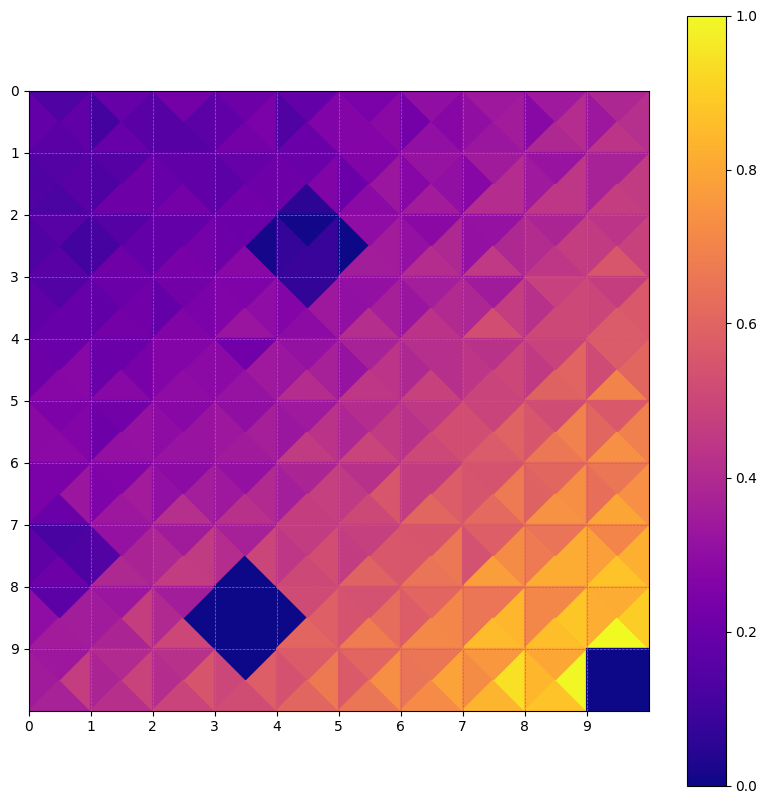

In [ ]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
p0 = DataParallel(ScoreNet(std_fn))
cond = Conditional(p0, hole_conditional_score, [map])
cond.load_state_dict(torch.load('modelp1.pth', weights_only=True))
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)
_, mask = hole_conditional_score(torch.randn_like(samples), [map])
## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(cond 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device
                                 mask=mask)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)


100%|██████████| 500/500 [00:00<00:00, 739.42it/s]


(100, 4)


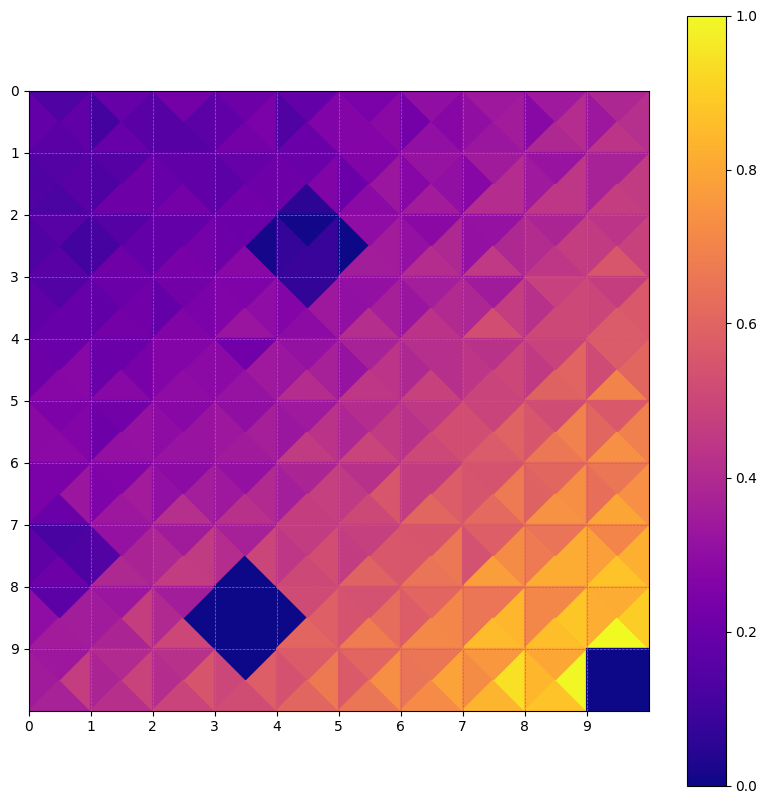

In [ ]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
p0 = DataParallel(ScoreNet(std_fn))
p0.load_state_dict(torch.load('modelp1.pth', weights_only=True))
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)

## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(p0, 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)


100%|██████████| 500/500 [00:00<00:00, 749.90it/s]


(100, 4)


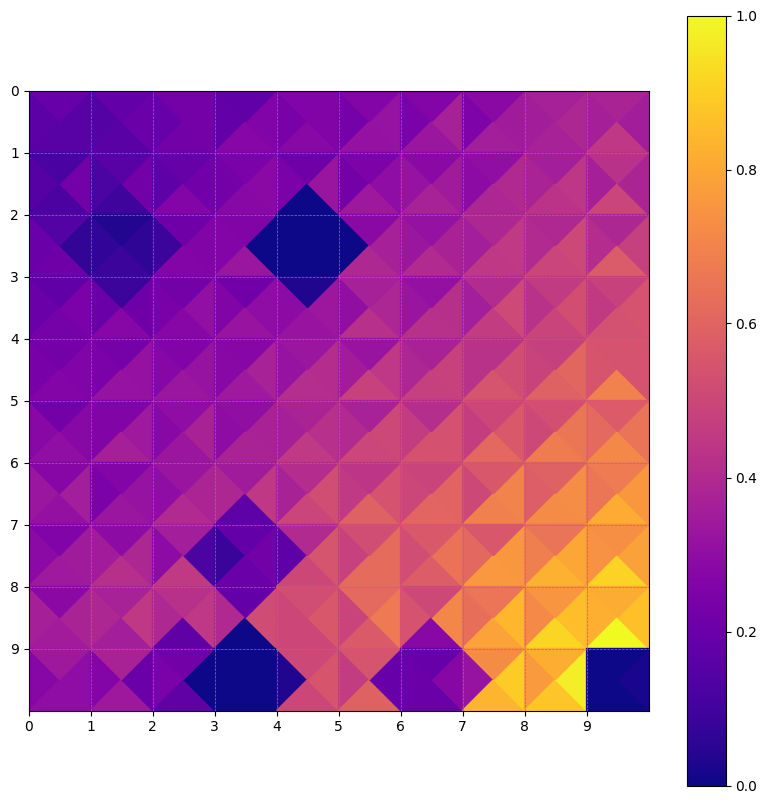

In [14]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
p1 = DataParallel(ScoreNet(std_fn))
p1.load_state_dict(torch.load('modelp1.pth', weights_only=True))
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)

## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(p1, 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)


100%|██████████| 500/500 [00:01<00:00, 400.34it/s]


(100, 4)


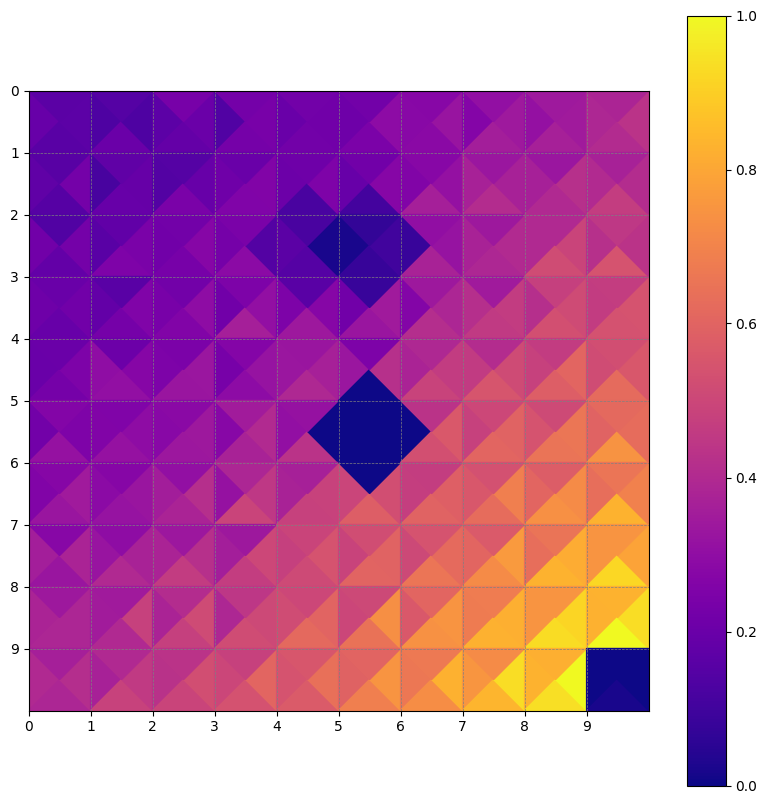

In [ ]:

device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
comp = Composition([p1, p0], [.5, .5])
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)

## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(comp, 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)


['SFFFFHFFFF', 'FFFFFFFFFF', 'FFFFFFFHFF', 'FFFFFFFFFF', 'FHFFFFFFFF', 'FFFFFFFFFF', 'FFFFFFFFFF', 'FFFFFFFHFF', 'FFFFFFFFFF', 'FFFFFFFFFG']


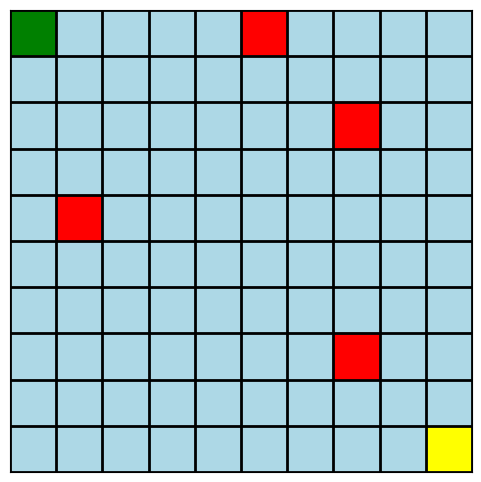

In [ ]:
map = generate_new_map(10, min_holes=4)[0]
print(map)
visualize_frozen_lake_rectangles(map)

100%|██████████| 500/500 [00:01<00:00, 364.39it/s]


1.373873233795166
(100, 4)


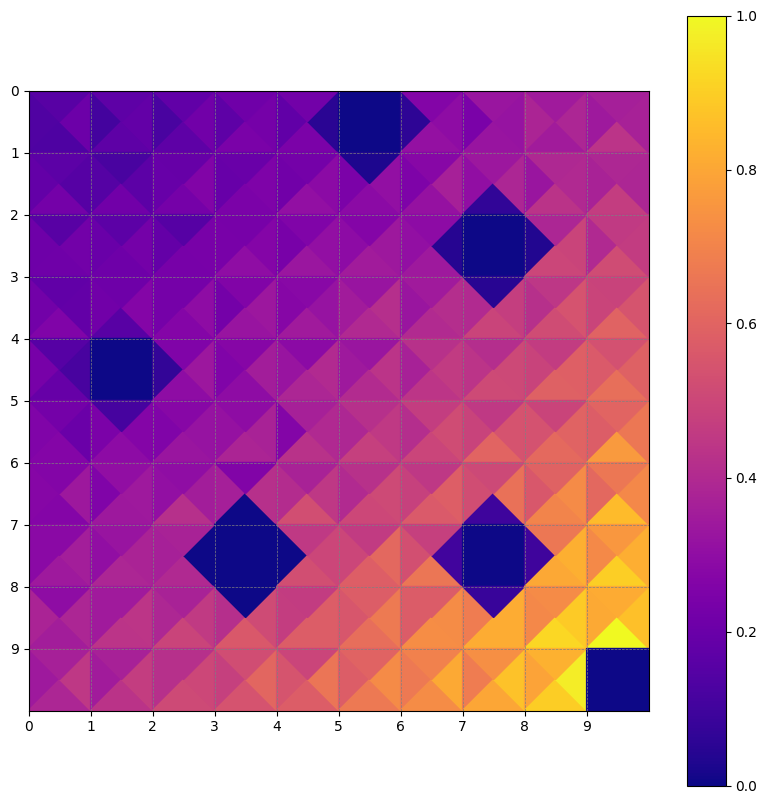

In [ ]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
cond = Conditional(comp, hole_conditional_score, [map])
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)

_, mask = hole_conditional_score(torch.randn_like(samples), [map])

start = time.time()
## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(cond, 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=1, 
                                 device=device,
                                 mask=mask)


end = time.time() - start
print(end)
## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)


  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 670.49it/s]


(100, 4)


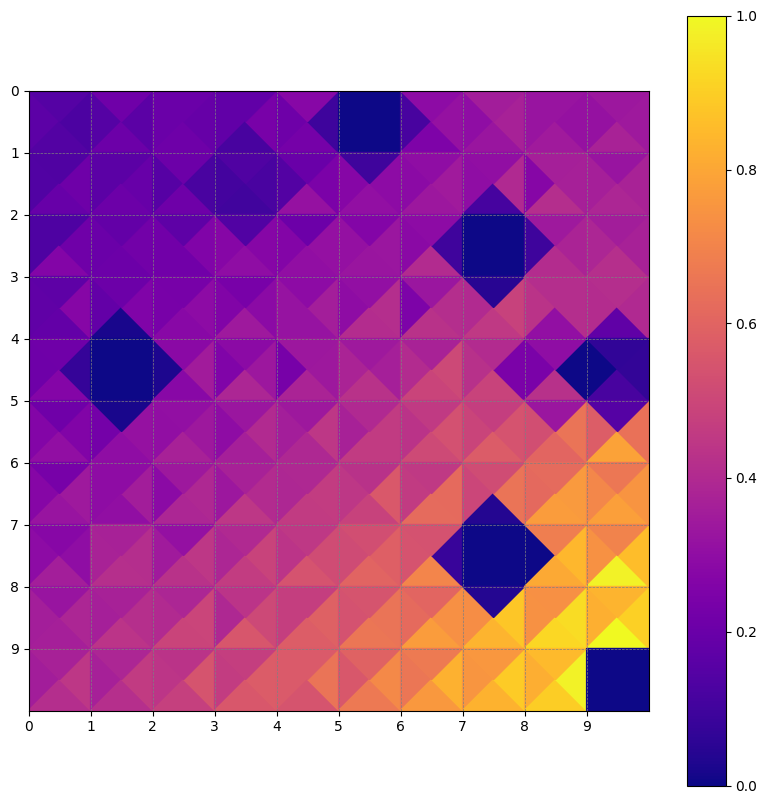

In [50]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
cond = Conditional(p1, hole_conditional_score, [map])
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)
_, mask = hole_conditional_score(torch.randn_like(samples), [map])
## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(cond,
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device,
                                 mask=mask)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 100).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 10)


In [ ]:

env = make_gym_env(.5, map=map)

start = time.time()
_, QV = q_value_iteration(env)
end = time.time() - start
print(end)

print(QV.shape)


0.07340025901794434
(100, 4)


In [ ]:
_, QV = q_value_iteration(env)
rewards = []
for ep in range(100):
    s, _ = env.reset()
    ep_rewards = []
    done = False
    while not done:
        s, r, trun, term, _ = env.step(np.argmax(QV[s.state]))
        ep_rewards.append(r.reward)
        done = term or trun
    rewards.append(np.sum(ep_rewards))
print(np.mean(rewards))


1.0


In [49]:
QV = sample
rewards = []
for ep in range(100):
    s, _ = env.reset()
    ep_rewards = []
    done = False
    while not done:
        s, r, trun, term, _ = env.step(np.argmax(QV[s.state]))
        ep_rewards.append(r.reward)
        done = term or trun
    rewards.append(np.sum(ep_rewards))
print(np.mean(rewards))


1.0


In [34]:
QV = np.random.randn(100, 4)
rewards = []
for ep in range(100):
    s, _ = env.reset()
    ep_rewards = []
    done = False
    while not done:
        s, r, trun, term, _ = env.step(np.argmax(QV[s.state]))
        ep_rewards.append(r.reward)
        done = term or trun
    rewards.append(np.sum(ep_rewards))
print(np.mean(rewards))


0.0


In [ ]:
env = make_gym_env(1, map=map)

start = time.time()
_, QV = q_value_iteration(env)
end = time.time() - start
print(end)

print(QV.shape)


0.05246233940124512
(100, 4)


In [38]:
_, QV = q_value_iteration(env)
rewards = []
for ep in range(100):
    s, _ = env.reset()
    ep_rewards = []
    done = False
    while not done:
        s, r, trun, term, _ = env.step(np.argmax(QV[s.state]))
        ep_rewards.append(r.reward)
        done = term or trun
    rewards.append(np.sum(ep_rewards))
print(np.mean(rewards))


1.0


In [37]:
QV = sample
rewards = []
for ep in range(100):
    s, _ = env.reset()
    ep_rewards = []
    done = False
    while not done:
        s, r, trun, term, _ = env.step(np.argmax(QV[s.state]))
        ep_rewards.append(r.reward)
        done = term or trun
    rewards.append(np.sum(ep_rewards))
print(np.mean(rewards))


1.0


100%|██████████| 500/500 [00:00<00:00, 742.46it/s]


(2500, 4)


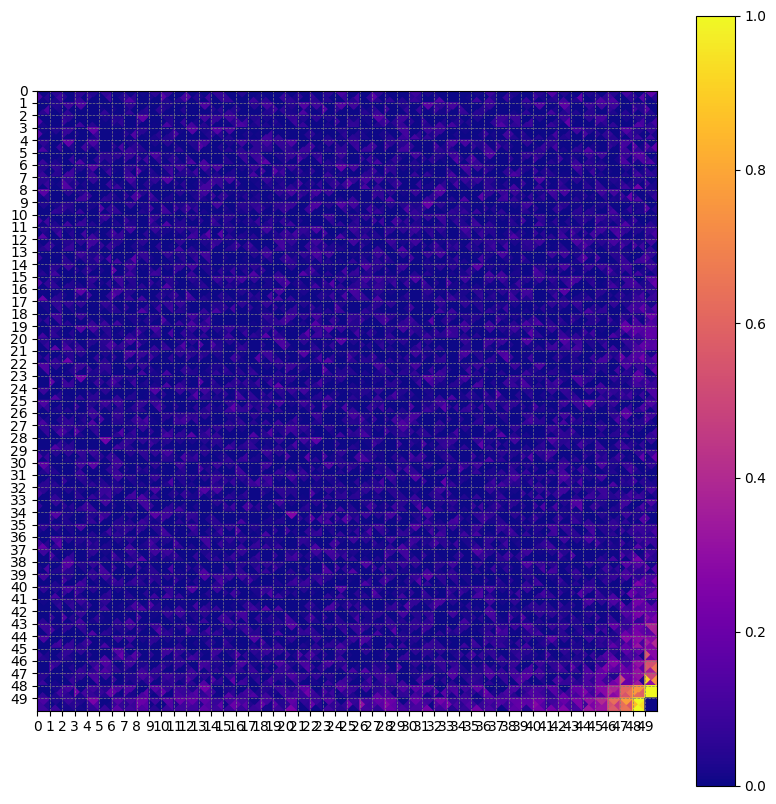

In [58]:
device = torch.device('cuda')
std_fn = get_marginal_prob_std_fn(sigma=25, device=device)
p0 = DataParallel(ScoreNet(std_fn))
p0.load_state_dict(torch.load('modelp0.pth', weights_only=True))
diffusion_coeff = get_diffusion_coeff_fn(sigma=25, device=device)

## Generate samples using the specified sampler.
samples = Euler_Maruyama_sampler(p0, 
                                 std_fn, 
                                 diffusion_coeff, 
                                 batch_size=16, 
                                 device=device,
                                 map_size=50)

## Sample visualization.
samples = samples.clamp(0.0, 1.0)
%matplotlib inline

sample = np.array(samples[0].to(torch.device('cpu')).reshape(4, 2500).permute(1, 0))
print(sample.shape)

visualize_value_map(sample, 50)


In [56]:
import time
from value_iteration import q_value_iteration
from data_gen import make_gym_env, generate_new_map

map, _ = generate_new_map(size=50)
env = make_gym_env(.5, map=map)

start = time.time()
_, QV = q_value_iteration(env)
end = time.time() - start
print(end)

print(QV.shape)


2.979386806488037
(2500, 4)
